In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



Using TensorFlow backend.


In [2]:
# MNISTデータセット読み込み（学習用、検証用）
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# データ数と次元（確認）
print('X_train {}'.format(X_train.shape)) # 学習用画像データ
print('y_train {}'.format(y_train.shape)) # 学習用正解ラベル
print('X_test {}'.format(X_test.shape)) # 検証用画像データ
print('y_test {}'.format(y_test.shape)) # 検証用正解ラベル


X_train (60000, 28, 28)
y_train (60000,)
X_test (10000, 28, 28)
y_test (10000,)


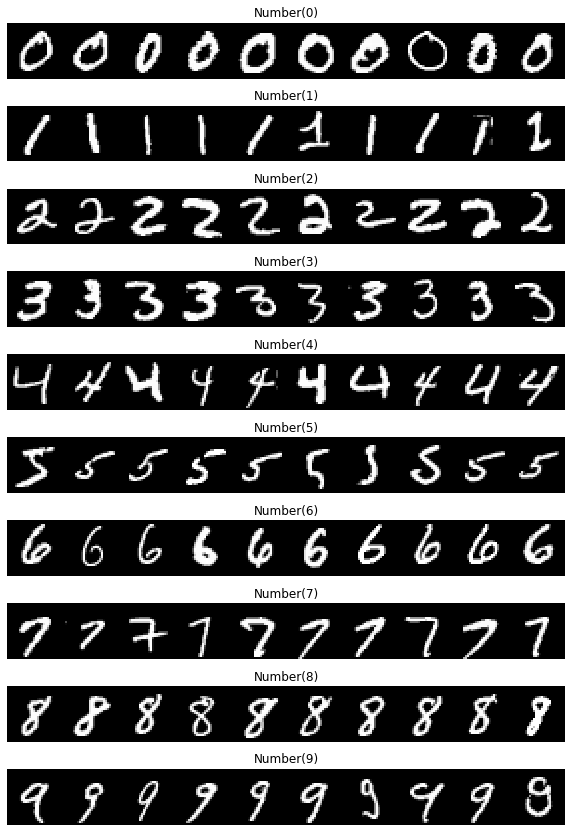

In [3]:
# 学習画像データを一部だけ可視化（画像確認）
fig, axes = plt.subplots(10, figsize=(10, 15))
for i in range(10):
    imgs = X_train[y_train == i][:10]
    axes[i].imshow(imgs.transpose(1, 0, 2).reshape(28, 28 * 10), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title("Number({})".format(i))


In [4]:
# データ変換と正規化
# 画像次元（画像サイズ）
img_rows, img_cols = 28, 28

# Kerasのバックエンド（Tensorflow、Theanoなど）で入力チャンネルの順番が違うため場合分けする
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else: # 'channels_last'
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# 確認　-> Tensorflowの場合、channel_last
K.image_data_format()

# データ正規化

X_train = X_train.astype('float32') # unit8 -> float32
X_test= X_test.astype('float32')

X_train /= 255 # 画像データ(0～255）を0～1.0に正規化
X_test /= 255



In [5]:
# 正解ラベルOne-hot化
num_classes = 10 # MNISTラベルの種類（数字0～9）
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


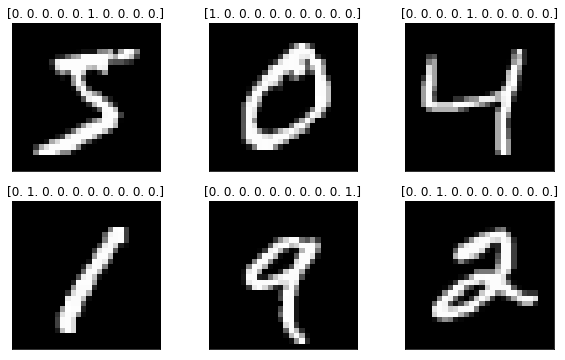

In [6]:
# 正解ラベルOne-hot化（データ確認）
fig = plt.figure(figsize=(10,6))

for i in range(6):
    ax = fig.add_subplot(2, 3, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(str(y_train[i]))


In [7]:
#モデル構築

# シーケンシャルモデル
model = Sequential()

# 畳み込み層（フィルター）
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape))

# 畳み込み層（フィルター）
model.add(Conv2D(64, (3,3), activation='relu'))

# プーリング層（縮小）
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) # 一次元に戻す

# 全結合層層
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# 出力層
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)      

In [8]:
# モデルのコンパイル（最適化アルゴリズム、損失関数、評価関数リストを指定）
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001),
              loss=keras.losses.mse,
              metrics=['accuracy'])



In [9]:
# 学習
batch_size = 128 # バッチサイズ
epochs = 8 # エポック

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 10s 161us/step - loss: 0.0105 - acc: 0.9288 - val_loss: 0.0035 - val_acc: 0.9768
Epoch 2/8
60000/60000 [==============================] - 5s 85us/step - loss: 0.0042 - acc: 0.9728 - val_loss: 0.0018 - val_acc: 0.9879
Epoch 3/8
60000/60000 [==============================] - 5s 84us/step - loss: 0.0032 - acc: 0.9793 - val_loss: 0.0019 - val_acc: 0.9869
Epoch 4/8
60000/60000 [==============================] - 5s 84us/step - loss: 0.0027 - acc: 0.9829 - val_loss: 0.0019 - val_acc: 0.9876
Epoch 5/8
60000/60000 [==============================] - 5s 84us/step - loss: 0.0025 - acc: 0.9843 - val_loss: 0.0017 - val_acc: 0.9884
Epoch 6/8
60000/60000 [==============================] - 5s 85us/step - loss: 0.0022 - acc: 0.9857 - val_loss: 0.0016 - val_acc: 0.9898
Epoch 7/8
60000/60000 [==============================] - 5s 85us/step - loss: 0.0020

In [10]:
# モデル評価
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', np.round(score[0], 4))
print('Test accuracy:', score[1])


Test loss: 0.0016
Test accuracy: 0.9899


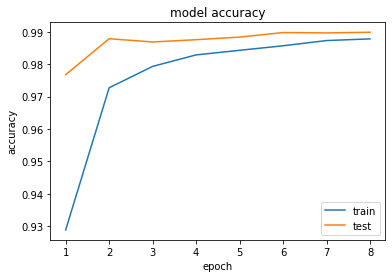

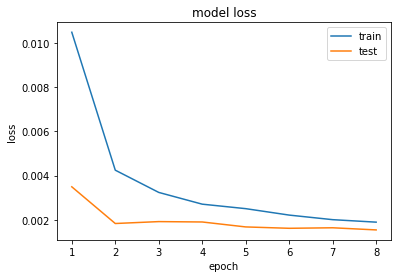

In [11]:
# モデル学習履歴をグラフで可視化
import matplotlib.pyplot as plt

#accuracy
plt.plot(range(1, len(history.history['acc'])+1), history.history['acc'])
plt.plot(range(1, len(history.history['val_acc'])+1), history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

#loss
plt.plot(range(1, len(history.history['loss'])+1), history.history['loss'])
plt.plot(range(1, len(history.history['val_loss'])+1), history.history['val_loss'])
plt.title('model accuracy')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [12]:
model.save('mnist_model.h5')


In [13]:
from keras.models import load_model
from keras.preprocessing.image import array_to_img, img_to_array,load_img
import os
import re

In [14]:
#自身の手書き数字の予測
model = load_model('mnist_model.h5')

def list_pictures(directory, ext='jpg|jpeg|bmp|png|ppm'):
    return [os.path.join(root, f)
            for root, _, files in os.walk(directory) for f in files
            if re.match(r'([\w]+\.(?:' + ext + '))', f.lower())]


In [15]:
for picture in list_pictures('./tegaki/'):
    X = []
    img = img_to_array(
        load_img(picture, target_size=(28, 28), grayscale=True))
    X.append(img)

    X = np.asarray(X)
    X = X.astype('float32')
    X = X / 255.0

    features = model.predict(X)

    print('----------')
    print(picture)
    print(features.argmax())
    print('----------')


----------
./tegaki/0.png
0
----------
----------
./tegaki/1.png
1
----------
----------
./tegaki/2.png
2
----------
----------
./tegaki/3.png
3
----------
----------
./tegaki/4.png
4
----------
----------
./tegaki/5.png
5
----------
----------
./tegaki/6.png
6
----------
----------
./tegaki/7.png
2
----------
----------
./tegaki/8.png
8
----------
----------
./tegaki/9.png
9
----------


C:\Users\Owner\Anaconda3\envs\gpu\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
